In [10]:
!pip install pandas_datareader
!pip install matplotlib
!pip install numpy
!pip install pandas

In [11]:
import pandas_datareader.data as pdr
import numpy as np
import datetime

In [12]:
# Download historical data for required stocks
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(364),datetime.date.today())

In [13]:
ohlcv.shape

(251, 6)

In [14]:
ohlcv.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-20,162.110001,155.300003,160.399994,156.830002,64773000.0,154.508499
2018-12-21,158.160004,149.630005,156.860001,150.729996,95744600.0,148.498795
2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540
2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475


In [15]:
ohlcv.tail(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,275.149994
2019-12-16,280.790009,276.980011,277.000000,279.859985,32046500.0,279.859985
2019-12-17,281.769989,278.799988,279.570007,280.410004,28539600.0,280.410004
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,279.739990


In [16]:
def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df['obv']

/home/johnny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


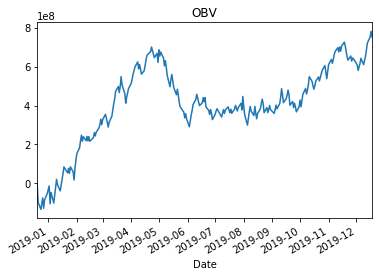

In [17]:
OBV(ohlcv).plot(title="OBV")